In [1]:
# import necessary libraries
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
# read the csv file
df = pd.read_csv('bestsellers with categories.csv')

In [4]:
# set the color palette
sns.set_palette(sns.color_palette('deep'))
sns.set(rc = {'figure.figsize': (9, 5)})
sns.set_style('whitegrid')

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Data Exploration


In [6]:
# show first few records
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [7]:
# get concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [8]:
# check missing values
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [9]:
# check duplicate values
df.duplicated().sum()

0

In [10]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [11]:
# range of prices
np.sort(df['Price'].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        27,  28,  30,  32,  36,  39,  40,  42,  46,  52,  53,  54,  82,
       105], dtype=int64)

Well, zero price would mean that amazon distributed those books for free, lets show these books labeled with zero price.

In [13]:
df[df['Price'] == 0]

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
193,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014,Fiction
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction
506,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction


# Data Visualization

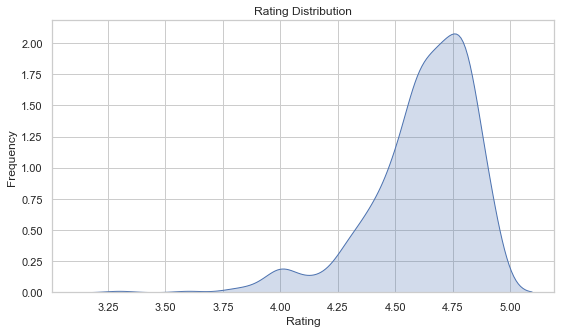

In [14]:
# ratings distribution
sns.kdeplot(df['User Rating'], shade = True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency');

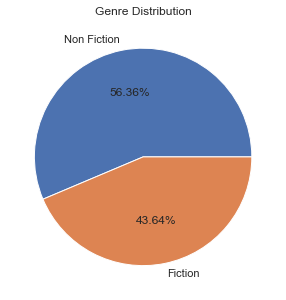

In [16]:
# genre distribution
plt.pie(df['Genre'].value_counts(), autopct = '%1.2f%%', labels = df['Genre'].value_counts().index)
plt.title('Genre Distribution');

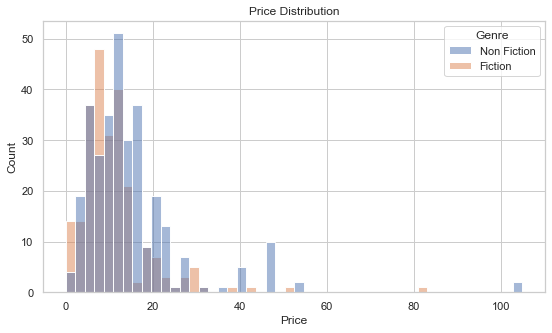

In [18]:
# price distribution
plt.title('Price Distribution')
sns.histplot(x = 'Price', hue = 'Genre', data = df);

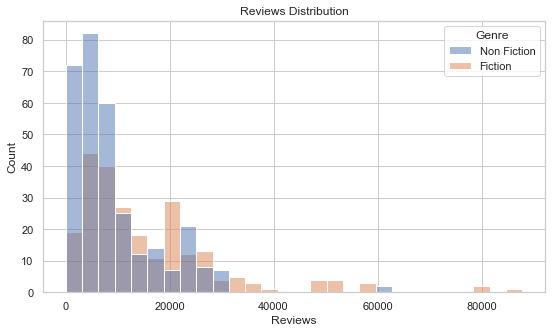

In [19]:
# reviews distribution
plt.title('Reviews Distribution')
sns.histplot(x = 'Reviews', hue = 'Genre', data = df);

In [20]:
# authors with most books
most_books = df['Author'].value_counts().head(10)
most_books

Jeff Kinney                           12
Gary Chapman                          11
Suzanne Collins                       11
Rick Riordan                          11
American Psychological Association    10
Dr. Seuss                              9
Gallup                                 9
Rob Elliott                            8
Stephenie Meyer                        7
Dav Pilkey                             7
Name: Author, dtype: int64

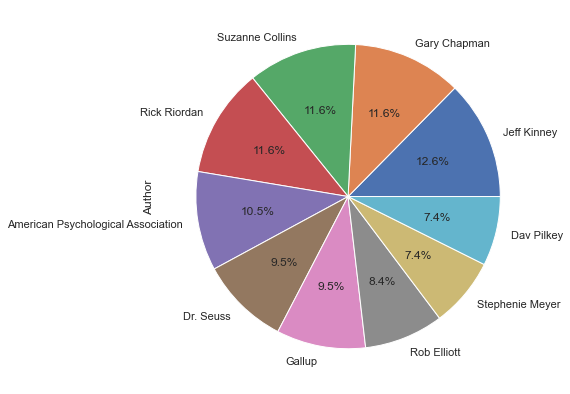

In [21]:
# visualise authors with most books
most_books.plot(kind = 'pie', autopct = '%1.1f%%', figsize = (7, 7));

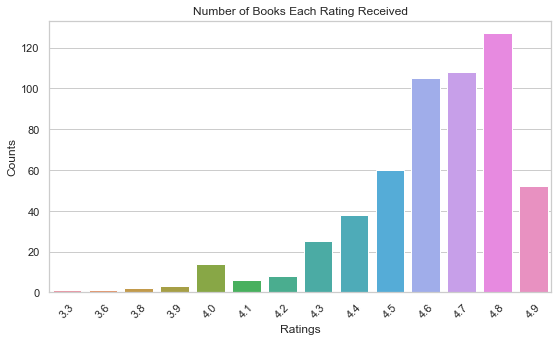

In [23]:
# number of books per rating?
sns.barplot(df['User Rating'].value_counts().index, df['User Rating'].value_counts())
plt.title('Number of Books Each Rating Received')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.xticks(rotation = 45);

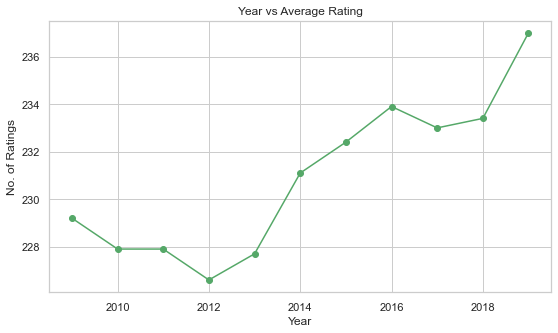

In [25]:
# year with highest rating
df.groupby('Year')['User Rating'].sum().plot(marker = 'o', c = 'g')
plt.title('Year vs Average Rating')
plt.xlabel('Year')
plt.ylabel('No. of Ratings');

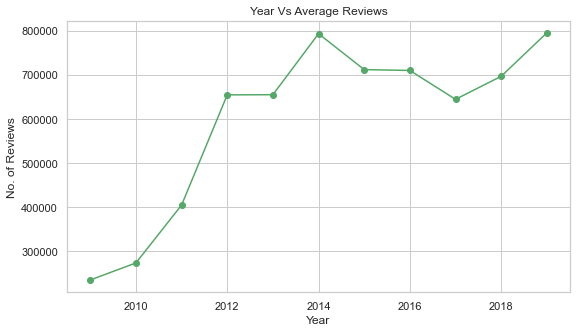

In [26]:
# year with highest reviews
df.groupby('Year')['Reviews'].sum().plot(marker = 'o', c = 'g')
plt.title('Year Vs Average Reviews')
plt.xlabel('Year')
plt.ylabel('No. of Reviews');

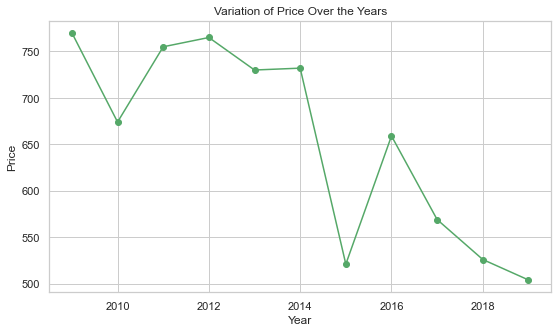

In [28]:
# price variation over the time
df.groupby('Year')['Price'].sum().plot(marker = 'o', c = 'g')
plt.title('Variation of Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Price');

In [ ]:
https://www.kaggle.com/data13/amazon-bestselling-eda-rating-predictions-97